In [613]:
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection, metrics   #Additional sklearn functions
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction import FeatureHasher
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import svm, linear_model, datasets
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

In [614]:
import timeit
start_time = timeit.default_timer()

print('Overall Time to run was: %0.2f seconds' %(timeit.default_timer() - start_time))

Overall Time to run was: 0.00 seconds


In [615]:
## Load Clean Data

In [616]:
start_time = timeit.default_timer()


In [617]:
day_21_E = pd.read_csv('day_21_E.csv', index_col=None)

In [618]:
print('Overall Time to run was: %0.2f seconds' %(timeit.default_timer() - start_time))

Overall Time to run was: 6.27 seconds


In [619]:
day_21_E.head()

,Label,I1,I2,I3,I4,I5,I6,I7,I8,I10,...,C18,C19,C20,C21,C22,C23,C24,C25,C26,I9_bin
0,1,1.343703,2.397895,2.564949,3.737670,3.737670,0.000000,0.000000,1.609438,0.000000,...,3c328ca5,9512c20b,156cbe87,96fbe197,15562d5d,1,e59d5dec,337b81aa,a0614ec9,2
1,1,0.869742,5.886104,0.693147,5.204007,1.098612,0.000000,0.000000,3.135494,0.000000,...,b8170bba,9512c20b,47849e55,73b3f46d,d994ba60,0,5aa3f86f,337b81aa,b757e957,1
2,1,1.363686,4.897840,0.000000,0.000000,2.944439,1.791759,0.000000,0.000000,1.098612,...,b8170bba,139221a3,1718cb69,e1937536,f9a6be50,0,52af1f06,ff654802,2ccea557,1
3,1,0.526589,5.982381,1.098612,1.386294,3.335848,0.693147,0.693147,2.564949,0.693147,...,7232d217,09c8c22c,1b6abda6,b03ac291,732e7fda,0,57e12694,30436bfc,962813c6,1
4,1,1.363686,4.477337,1.098612,1.098612,3.335848,1.609438,0.000000,7.417580,1.098612,...,b8170bba,9512c20b,48caeb71,c861be2d,056ca69d,0,5dea4c3e,30436bfc,b757e957,2


In [620]:
day_21_E.dtypes

Label       int64
I1        float64
I2        float64
I3        float64
I4        float64
I5        float64
I6        float64
I7        float64
I8        float64
I10       float64
I11       float64
I12       float64
I13       float64
C1         object
C2         object
C3         object
C4         object
C5         object
C6         object
C7         object
C8         object
C9         object
C10        object
C11        object
C12        object
C13        object
C14         int64
C15        object
C16         int64
C17         int64
C18        object
C19        object
C20        object
C21        object
C22        object
C23         int64
C24        object
C25        object
C26        object
I9_bin      int64
dtype: object

In [621]:
# C23, C17, C16, C14 ---boolean

In [622]:
cat_ohe = ['C6','C13','C19']

In [623]:
cat_e = ['C1','C2','C3','C4','C5','C7','C8','C9','C10','C11','C12','C15','C18','C20','C21','C22','C24','C25','C26']

In [624]:
cat_col = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10', 'C11', 'C12', 'C13','C15','C18','C19','C20','C21','C22','C24','C25','C26']

In [625]:
## Instead of hot coding and causing a huge number of columns, I will encode.

In [626]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
for c in cat_e:   
    encoder_x=LabelEncoder()
    day_21_E[c]=encoder_x.fit_transform(day_21_E[c])

In [627]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
for c in cat_ohe:   
    encoder_x=LabelEncoder()
    day_21_E[c]=encoder_x.fit_transform(day_21_E[c])

In [628]:
day_21_E.shape

(423582, 40)

In [629]:
day_21_E = pd.get_dummies(data=day_21_E, columns=['C6'])
day_21_E = pd.get_dummies(data=day_21_E, columns=['C13'])
day_21_E = pd.get_dummies(data=day_21_E, columns=['C19'])

In [630]:
day_21_E.shape

(423582, 63)

In [631]:
day_21_E.columns

Index([u'Label', u'I1', u'I2', u'I3', u'I4', u'I5', u'I6', u'I7', u'I8',
       u'I10', u'I11', u'I12', u'I13', u'C1', u'C2', u'C3', u'C4', u'C5',
       u'C7', u'C8', u'C9', u'C10', u'C11', u'C12', u'C14', u'C15', u'C16',
       u'C17', u'C18', u'C20', u'C21', u'C22', u'C23', u'C24', u'C25', u'C26',
       u'I9_bin', u'C6_0', u'C6_1', u'C6_2', u'C13_0', u'C13_1', u'C13_2',
       u'C13_3', u'C13_4', u'C13_5', u'C13_6', u'C13_7', u'C13_8', u'C19_0',
       u'C19_1', u'C19_2', u'C19_3', u'C19_4', u'C19_5', u'C19_6', u'C19_7',
       u'C19_8', u'C19_9', u'C19_10', u'C19_11', u'C19_12', u'C19_13'],
      dtype='object')

In [632]:
day_21_E.dtypes

Label       int64
I1        float64
I2        float64
I3        float64
I4        float64
I5        float64
I6        float64
I7        float64
I8        float64
I10       float64
I11       float64
I12       float64
I13       float64
C1          int64
C2          int64
C3          int64
C4          int64
C5          int64
C7          int64
C8          int64
C9          int64
C10         int64
C11         int64
C12         int64
C14         int64
C15         int64
C16         int64
C17         int64
C18         int64
C20         int64
           ...   
C24         int64
C25         int64
C26         int64
I9_bin      int64
C6_0        uint8
C6_1        uint8
C6_2        uint8
C13_0       uint8
C13_1       uint8
C13_2       uint8
C13_3       uint8
C13_4       uint8
C13_5       uint8
C13_6       uint8
C13_7       uint8
C13_8       uint8
C19_0       uint8
C19_1       uint8
C19_2       uint8
C19_3       uint8
C19_4       uint8
C19_5       uint8
C19_6       uint8
C19_7       uint8
C19_8     

In [633]:
#enc = OneHotEncoder()
#temp = enc.fit_transform(day_21_E.C6)
#temp.head()



In [634]:
day_21_E.shape

(423582, 63)

In [499]:
day_21_E.isnull().sum()

C1           0
C10          0
C11          0
C12          0
C14          0
C15          0
C16          0
C17          0
C18          0
C2           0
C20          0
C21          0
C22          0
C23          0
C24          0
C25          0
C26          0
C3           0
C4           0
C5           0
C7           0
C8           0
C9           0
I1           0
I10          0
I11          0
I12          0
I13          0
I2           0
I3           0
            ..
new_feat4    0
new_feat5    0
new_feat6    0
I9_bin       0
C6_0         0
C6_1         0
C6_2         0
C13_0        0
C13_1        0
C13_2        0
C13_3        0
C13_4        0
C13_5        0
C13_6        0
C13_7        0
C13_8        0
C19_0        0
C19_1        0
C19_2        0
C19_3        0
C19_4        0
C19_5        0
C19_6        0
C19_7        0
C19_8        0
C19_9        0
C19_10       0
C19_11       0
C19_12       0
C19_13       0
dtype: int64

In [635]:
day_21_E.to_csv('day21datas.csv', index=False)

In [636]:
##load target and predictors
y=day_21_E['Label']

In [637]:
day_21_E.drop(['Label'],axis = 1, inplace=True)

In [638]:
X = day_21_E

In [639]:
##check the lengths
len(y)

423582

In [640]:
X.shape

(423582, 62)

In [641]:
X.head()

,I1,I2,I3,I4,I5,I6,I7,I8,I10,I11,...,C19_4,C19_5,C19_6,C19_7,C19_8,C19_9,C19_10,C19_11,C19_12,C19_13
0,1.343703,2.397895,2.564949,3.737670,3.737670,0.000000,0.000000,1.609438,0.000000,1.386294,...,0,0,0,0,0,1,0,0,0,0
1,0.869742,5.886104,0.693147,5.204007,1.098612,0.000000,0.000000,3.135494,0.000000,1.098612,...,0,0,0,0,0,1,0,0,0,0
2,1.363686,4.897840,0.000000,0.000000,2.944439,1.791759,0.000000,0.000000,1.098612,1.945910,...,0,0,0,0,0,0,0,0,0,0
3,0.526589,5.982381,1.098612,1.386294,3.335848,0.693147,0.693147,2.564949,0.693147,1.860981,...,0,0,0,0,0,0,0,0,0,0
4,1.363686,4.477337,1.098612,1.098612,3.335848,1.609438,0.000000,7.417580,1.098612,1.860981,...,0,0,0,0,0,1,0,0,0,0


In [643]:
#Can't do on a sparse matrix, Random Forest does not need this
from sklearn.preprocessing import StandardScaler

#ss = StandardScaler()
#Xs = ss.fit_transform(X)

In [644]:
## Save a test version of the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [646]:
X_train.shape

(296507, 62)

In [647]:
len(y_train)

296507

In [648]:
###
#Baseline
baseline = 1. - np.mean(y)
print 'baseline:', baseline

baseline: 0.457521802154


In [649]:
#Baseline2
baseline = np.mean(y)
print 'baseline:', baseline

baseline: 0.542478197846


In [650]:
### I tried FeatureHasher from sklearn. There was no difference in results.
#fh = FeatureHasher(n_features=2**20, input_type="string")

In [651]:
#Xcat = fh.transform(np.asarray(X_train.astype(str)))

In [652]:
#Xcat.shape

In [653]:
# What if we just use logistic regression without doing anything?
logistic = linear_model.LogisticRegression()
cross_val_score(logistic, X_train, y_train, cv=5, scoring='accuracy').mean()


0.62520609961425955

In [ ]:
# Linear Regression One

In [612]:
grid = {
        'C': np.power(10.0, np.arange(-10, 10))
         , 'solver': ['newton-cg']
    }
clf = LogisticRegression(penalty='l2', random_state=777, max_iter=10000, tol=10)
gs = GridSearchCV(clf, grid, scoring='roc_auc', cv=10)
gs.fit(X_test, y_test)
print ('gs.best_score_:', gs.best_score_)

('gs.best_score_:', 0.9547057399112244)


In [ ]:
# Linear Regression 2

In [ ]:
gs_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.logspace(-5,0,100)
}

lr_gridsearch = GridSearchCV(LogisticRegression(), gs_params, cv=5, verbose=1)

In [ ]:
coef_df = pd.DataFrame({
        'coef':best_lr.coef_[0],
        'feature':X.columns
    })

In [ ]:
coef_df['abs_coef'] = np.abs(coef_df.coef)

In [ ]:
# sort by absolute value of coefficient (magnitude)
coef_df.sort_values('abs_coef', ascending=False, inplace=True)

In [ ]:
# Show non-zero coefs and predictors
coef_df[coef_df.coef != 0]

In [ ]:
##### Random Forest Model

In [ ]:
## First Model
model1 = RandomForestClassifier(random_state=0)
param_grid = { "n_estimators"      : [50,100,200],
           "max_features"      : [3, 5],
           "max_depth"         : [2,5,10],
           "min_samples_split" : [2, 4] }
gs1 = GridSearchCV(model1, param_grid, n_jobs=-1, cv=5)
gs1.fit(X_train, y_train)
print gs1.best_params_

Process PoolWorker-35:
Process PoolWorker-38:
Process PoolWorker-36:
Process PoolWorker-37:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/marthawhite/anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/marthawhite/anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/marthawhite/anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/marthawhite/anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
  File "/Users/marthawhite/anaconda/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/Users/marthawhite/anaconda/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
    self.run()
    self.run()
  File "/Use

In [305]:
rf_best1 = gs1.best_estimator_ 

In [319]:
rf_best1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [545]:
rf_best1.feature_importances_

array([  1.92536129e-03,   8.93933674e-03,   2.30174302e-03,
         1.67361143e-02,   4.46360560e-04,   7.64606395e-04,
         6.30968114e-04,   2.09393482e-04,   8.02910828e-06,
         1.55545959e-03,   3.67718882e-04,   1.36226040e-03,
         9.39017659e-03,   9.99611401e-04,   3.07270261e-04,
         2.68664159e-05,   1.12611034e-04,   1.25057864e-03,
         7.43194607e-05,   1.06660715e-05,   8.78166358e-06,
         4.68977676e-03,   8.33022129e-05,   6.86335620e-04,
         2.38425274e-04,   1.09077151e-03,   1.18388699e-02,
         1.24191296e-02,   1.38575786e-02,   3.30073815e-03,
         1.76567207e-04,   1.20369381e-04,   2.86408863e-02,
         1.24825435e-02,   1.11915834e-02,   1.18768639e-04,
         3.13970060e-05,   4.47058817e-04,   5.35619199e-01,
         6.17114234e-02,   2.00194962e-02,   4.53218526e-02,
         3.04954729e-02,   1.57944221e-01,   4.59999578e-05])

In [320]:
#Predict training set:
#y_train = cross_val_predict(rf_best1, X_test, y_train, cv=10) 
#Xcat_test = fh.transform(np.asarray(X_test.astype(str)))
ypred = rf_best1.predict(X_test)
yproba = rf_best1.predict_proba(X_test)[:,1]
    

In [321]:
tp = np.sum((y_test == 1) & (ypred == 1))
fp = np.sum((y_test == 0) & (ypred == 1))
tn = np.sum((y_test == 0) & (ypred == 0))
fn = np.sum((y_test == 1) & (ypred == 0))
print tp, fp, tn, fn

63645 0 50714 0


In [317]:
from sklearn.metrics import accuracy_score

total_population = tp + fp + tn + fn

print accuracy_score(y_test, ypred)
print float(tp + tn) / total_population

1.0
1.0


In [309]:
thresh_0 = (y_train==0).sum()/float(len(y_train))

In [547]:
# Print model report:
print("\nRandom Forest Model Report")
print('Threshold Accuracy Needed: %0.2f%%' %(thresh_0*100))
train_accu = float(metrics.accuracy_score(y_train, y_train))*100
train_auc = float(metrics.roc_auc_score(y_train, y_train))*100
print( "Train Accuracy : %.1f%%" % train_accu)
print('Train AUC Score : %0.4f' %(train_auc))
    
test_accu = float(metrics.accuracy_score(y_test, ypred))*100
test_auc = float(metrics.roc_auc_score(y_test, ypred))*100
print( "Test Accuracy : %.1f%%" % test_accu)
print('Test AUC Score : %0.4f' %(test_auc))
print('Random Forest Model Params (best): %s'%gs1.best_params_)




Random Forest Model Report
Threshold Accuracy Needed: 45.71%
Train Accuracy : 100.0%
Train AUC Score : 100.0000
Test Accuracy : 100.0%
Test AUC Score : 100.0000
Random Forest Model Params (best): {'max_features': 5, 'min_samples_split': 2, 'n_estimators': 200, 'max_depth': 10}


In [582]:
## Second Model
model2 = RandomForestClassifier(random_state=0,class_weight={1:3,0:1})
param_grid = { "n_estimators"      : [50,100,200],
           "max_features"      : [3, 5],
           "max_depth"         : [2,5,10],
           "min_samples_split" : [2, 4] }
gs2 = GridSearchCV(model2, param_grid, n_jobs=-1, cv=5)
gs2.fit(X_train, y_train)
print gs2.best_params_

{'max_features': 5, 'min_samples_split': 4, 'n_estimators': 200, 'max_depth': 10}


In [583]:
rf_best2 = gs2.best_estimator_ 

In [584]:
rf_best2.feature_importances_

array([  3.30924891e-03,   4.29531115e-03,   1.95560960e-02,
         4.50844315e-03,   1.77189950e-03,   4.44418694e-03,
         1.54277874e-03,   1.58816217e-03,   6.75129443e-04,
         3.26857501e-03,   3.47363104e-03,   1.76924054e-02,
         3.25052268e-03,   1.34957790e-03,   1.56190981e-03,
         9.57062503e-04,   3.48578659e-03,   1.67099518e-03,
         8.84248100e-04,   9.79366830e-04,   1.94493423e-03,
         4.30942484e-03,   2.26209791e-03,   7.06801396e-03,
         1.06078067e-02,   1.56488435e-02,   1.65746361e-02,
         7.02500849e-03,   2.26116680e-03,   1.95392684e-03,
         2.23792985e-02,   1.04467696e-02,   1.22050791e-02,
         1.06179824e-03,   1.47485712e-03,   2.33323076e-03,
         1.43536574e-01,   5.84845802e-02,   1.01197469e-01,
         6.59626241e-02,   3.46846415e-01,   3.05690355e-04,
         1.10803518e-03,   4.95430819e-03,   1.88169695e-07,
         4.95395148e-03,   5.85504776e-03,   3.39451222e-03,
         3.43749157e-03,

In [588]:
##Predict training set:
#ytrain = cross_val_predict(rf_best2, Xcat, y_train, cv=10) 
#Xcat_test = fh.transform(np.asarray(X_test.astype(str)))
ypred = rf_best2.predict(X_test)
yproba = rf_best2.predict_proba(X_test)
    

In [589]:
thresh_0 = (y_train==0).sum()/float(len(y_train))

In [590]:
# Print model report:
print("\nRandom Forest Model Report")
print('Threshold Accuracy Needed: %0.2f%%' %(thresh_0*100))
train_accu = float(metrics.accuracy_score(y_train, y_train))*100
train_auc = float(metrics.roc_auc_score(y_train, y_train))*100
print( "Train Accuracy : %.1f%%" % train_accu)
print('Train AUC Score : %0.4f' %(train_auc))
    
test_accu = float(metrics.accuracy_score(y_test, ypred))*100
test_auc = float(metrics.roc_auc_score(y_test, ypred))*100
print( "Test Accuracy : %.1f%%" % test_accu)
print('Test AUC Score : %0.4f' %(test_auc))
print('Random Forest Model Params (best): %s'%gs2.best_params_)





Random Forest Model Report
Threshold Accuracy Needed: 45.71%
Train Accuracy : 100.0%
Train AUC Score : 100.0000
Test Accuracy : 81.8%
Test AUC Score : 80.2579
Random Forest Model Params (best): {'max_features': 5, 'min_samples_split': 4, 'n_estimators': 200, 'max_depth': 10}


In [591]:
print(classification_report(y_test, ypred))

             precision    recall  f1-score   support

          0       0.97      0.62      0.76     58236
          1       0.75      0.98      0.85     68839

avg / total       0.85      0.82      0.81    127075



In [593]:
#### Roc_Curve

In [594]:
# Get the predicted probability vector and explicitly name the columns:
Y_pp = pd.DataFrame(gs2.predict_proba(X_test), columns=['class_0_pp','class_1_pp'])
Y_pp.head()

,class_0_pp,class_1_pp
0,0.146646,0.853354
1,0.182657,0.817343
2,0.095081,0.904919
3,0.075953,0.924047
4,0.072649,0.927351


In [606]:
# In order to do this, we can lower the threshold for predicting class 1.
# This will reduce our false negative rate to 0, but at the expense of a higher false positive rate.
Y_pp['pred_class_thresh10'] = [1 if x >= 0.75 else 0 for x in Y_pp.class_1_pp.values]
Y_pp.head(10)

,class_0_pp,class_1_pp,pred_class_thresh10
0,0.146646,0.853354,1
1,0.182657,0.817343,1
2,0.095081,0.904919,1
3,0.075953,0.924047,1
4,0.072649,0.927351,1
5,0.535109,0.464891,0
6,0.577023,0.422977,0
7,0.581195,0.418805,0
8,0.141238,0.858762,1
9,0.539791,0.460209,0


In [607]:
conmat = np.array(confusion_matrix(y_test, Y_pp.pred_class_thresh10.values, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['click', 'no_click'],
                         columns=['predicted_click','predicted_no_click'])
confusion

,predicted_click,predicted_no_click
click,63329,5510
no_click,9938,48298


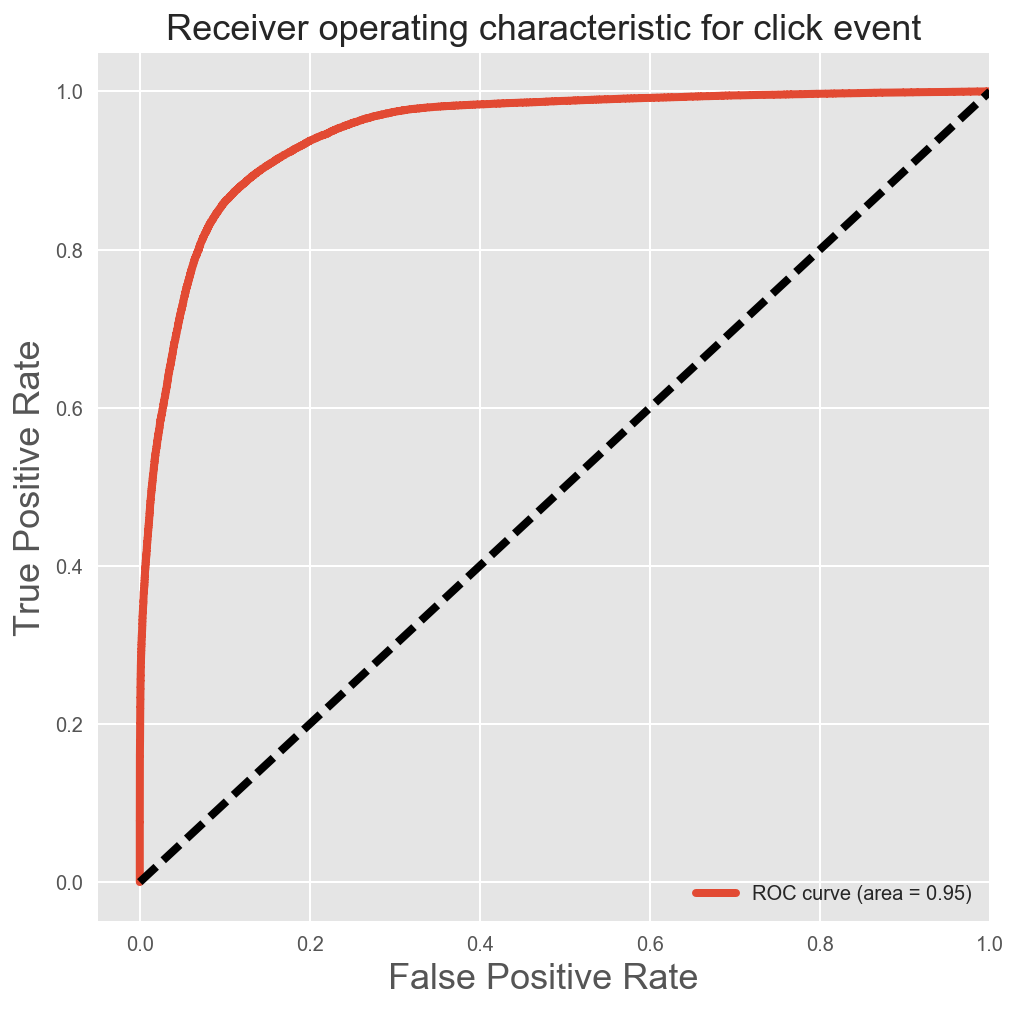

In [608]:
from sklearn.metrics import roc_curve, auc
# For class 1, find the area under the curve
fpr, tpr, _ = roc_curve(y_test, Y_pp.class_1_pp)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for click event', fontsize=18)
plt.legend(loc="lower right")
plt.show()